# Chapter 8 Tree based Methods
# Exercise

In [1]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/data/islr2')

Mounted at /content/drive


## 9.

In [33]:
data = pd.read_csv('./OJ.csv')

In [34]:
data['Store7'] = data['Store7'].map({'Yes':1, 'No':0})

In [43]:
from sklearn.model_selection import train_test_split
train = data.drop(['Purchase'], axis=1)
target = data['Purchase']

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=97)

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'LoyalCH <= 0.482\ngini = 0.477\nsamples = 856\nvalue = [519, 337]\nclass = CH'),
 Text(0.25, 0.625, 'LoyalCH <= 0.276\ngini = 0.361\nsamples = 321\nvalue = [76, 245]\nclass = MM'),
 Text(0.125, 0.375, 'LoyalCH <= 0.051\ngini = 0.21\nsamples = 176\nvalue = [21, 155]\nclass = MM'),
 Text(0.0625, 0.125, 'gini = 0.032\nsamples = 62\nvalue = [1, 61]\nclass = MM'),
 Text(0.1875, 0.125, 'gini = 0.289\nsamples = 114\nvalue = [20, 94]\nclass = MM'),
 Text(0.375, 0.375, 'PriceDiff <= 0.25\ngini = 0.471\nsamples = 145\nvalue = [55, 90]\nclass = MM'),
 Text(0.3125, 0.125, 'gini = 0.385\nsamples = 96\nvalue = [25, 71]\nclass = MM'),
 Text(0.4375, 0.125, 'gini = 0.475\nsamples = 49\nvalue = [30, 19]\nclass = CH'),
 Text(0.75, 0.625, 'LoyalCH <= 0.765\ngini = 0.285\nsamples = 535\nvalue = [443, 92]\nclass = CH'),
 Text(0.625, 0.375, 'ListPriceDiff <= 0.235\ngini = 0.422\nsamples = 261\nvalue = [182, 79]\nclass = CH'),
 Text(0.5625, 0.125, 'gini = 0.499\nsamples = 105\nvalue = [50, 

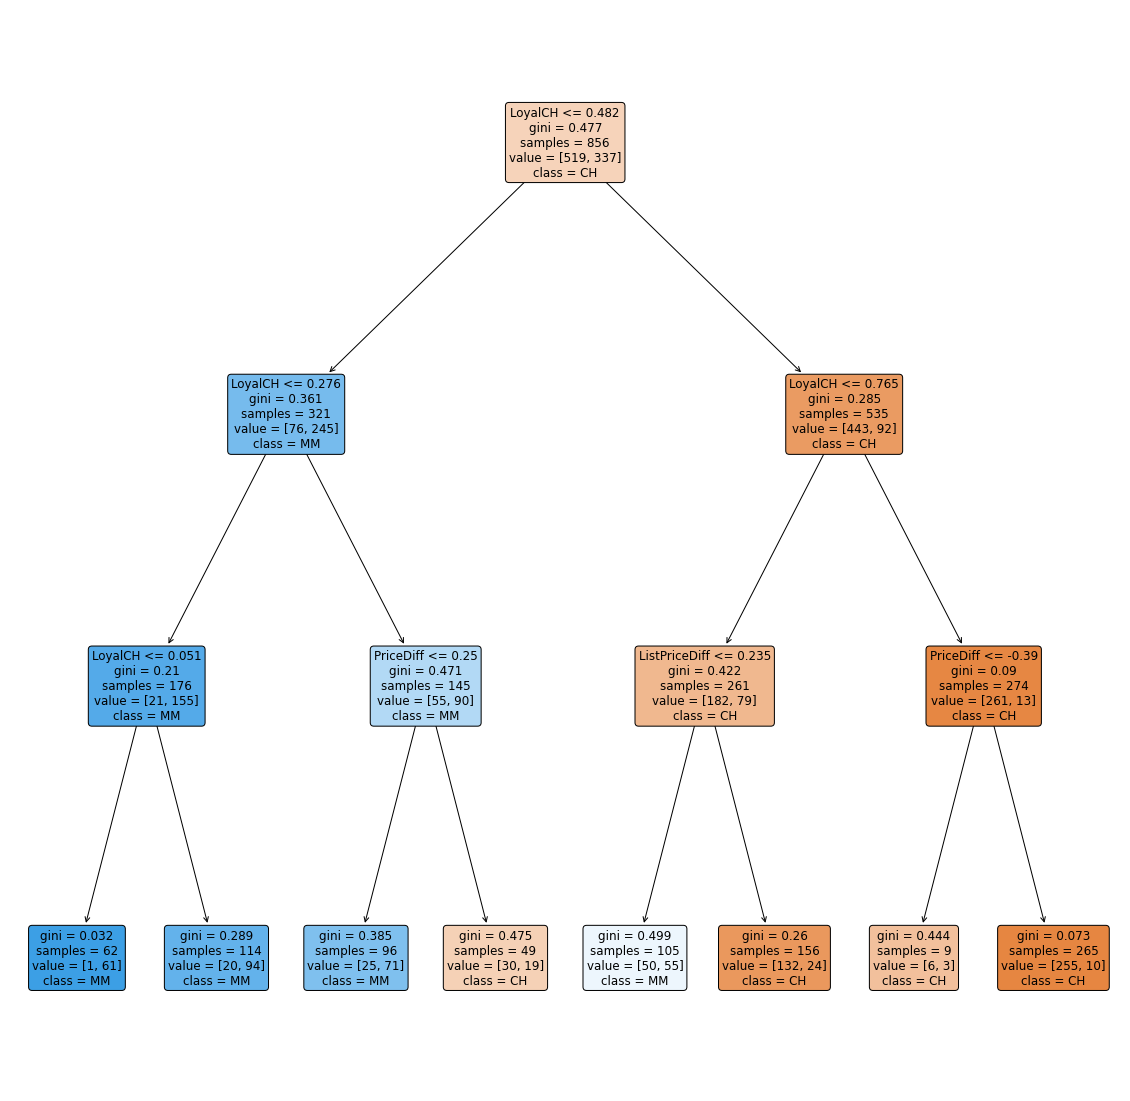

In [45]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(dt,
          class_names=['CH', 'MM'],
          feature_names=train.columns,
          impurity=True, filled=True,
          rounded=True)

WeekofPurchase : 0.000
StoreID : 0.000
PriceCH : 0.000
PriceMM : 0.000
DiscCH : 0.000
DiscMM : 0.000
SpecialCH : 0.000
SpecialMM : 0.000
LoyalCH : 0.864
SalePriceMM : 0.000
SalePriceCH : 0.000
PriceDiff : 0.048
Store7 : 0.000
PctDiscMM : 0.000
PctDiscCH : 0.000
ListPriceDiff : 0.087
STORE : 0.000


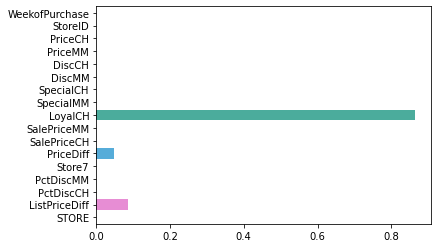

In [49]:
import seaborn as sns

# feature별 importance 매핑
for name, value in zip(train.columns, dt.feature_importances_):
    print('{} : {:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt.feature_importances_ , y=train.columns)

In [50]:
dt.score(X_test, y_test)

0.8130841121495327

## 12.

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
bc = BaggingClassifier()
lgr = LogisticRegression()

model_list = [gb, rf, bc, lgr]
trscore = []
tscore = []

for m in model_list:
    m.fit(X_train, y_train)
    strain = m.score(X_train, y_train)
    st = m.score(X_test, y_test)
    trscore.append(strain)
    tscore.append(st)

print('train_score = ', trscore)
print('test_score = ', tscore)

train_score =  [0.8960280373831776, 0.9906542056074766, 0.9672897196261683, 0.8294392523364486]
test_score =  [0.8411214953271028, 0.8177570093457944, 0.8271028037383178, 0.8504672897196262]


로지스틱회귀가 트리 모델보다 점수가 높게 나옴.

트리 모델은 하이퍼파라미터 설정을 하지 않으면 쉽게 오버피팅되기 때문에 이런 결과가 나온것으로 보임.